In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

# from google.colab import drive
# drive.mount("/content/drive")

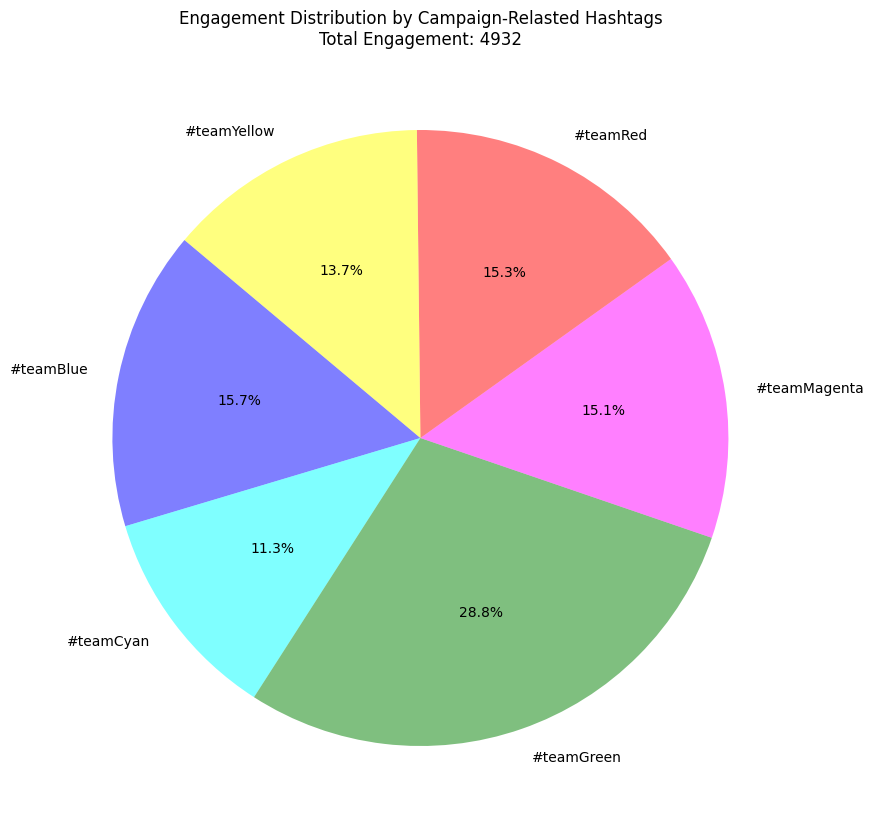

In [12]:
# ---
# Group No. 12
# 1. ภูผา ยอดคีรี 6210450270
# 2. ณัฐนันท์ อุ่นเเจ่ม 6410450010
# 3. สุรเดช เพชรพิเศษศรี 6410450621
# 4. เขมรัตน์ บุณยชาต 6410450362
# ---

group = 12 # อย่าลืมเปลี่ยนเลขกลุ่ม
problem = 4 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".json"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_json(data_path, lines=True)

# --- เริ่มเขียนโค้ดตรงนี้ ---

data['TotalEngagement'] = data['Likes']+data['Retweets'] # คำนวณหา total engagement ของแต่ละโพส
data.drop(['TweetID', 'Timestamp', 'TweetText', 'Username'], axis=1, inplace=True) # ลบ column ที่ไม่สำคัญออกไป
data = data.dropna(subset=['Hashtag']) # ลบ column ที่ไม่มีข้อมูล
#data = data[data['TotalEngagement'] != 0] # ลบข้อมูลที่เป็น 0
data = data[data['Hashtag'].str.contains('team')] # ลบข้อมูลที่ไม่มี hashtag คำว่า team
data['Hashtag'] = data['Hashtag'].str.split(', ').str[0] # เลือกเเฉพาะ hashtag ที่มีคำว่า team ถ้ามี hashtag มากกว่า 1 อัน
data = data.groupby('Hashtag').agg({'Likes': 'sum', 'Retweets': 'sum', 'TotalEngagement': 'sum'}).reset_index() # รวม hashtag ของแต่ละสีเข้าด้วยกัน

new_data = data[data['TotalEngagement'] > 0] # สร้าง data ใหม่ที่ไม่มีทีมที่มี total engagement เท่ากับ 0
labels = ['#' + label for label in new_data['Hashtag']] # เพิ่ม '#' ข้างหน้าแต่ละทีม
colors = new_data['Hashtag'].str.split('m').str[1] # ดึงชื่อสีของแต่ละทีมมาใช้เป็นสีใน pie chart

plt.figure(figsize=(10, 10)) # ปรับขนาดกราฟ
plt.pie(new_data['TotalEngagement'], labels=labels, autopct='%1.1f%%', startangle=140, colors=colors) # พล็อต pie chart
plt.setp(plt.gca().patches, alpha=0.5) # ตั้งค่าให้สีของ pie chart จางลง
plt.title(f'Engagement Distribution by Campaign-Relasted Hashtags\nTotal Engagement: {sum(data["TotalEngagement"])}') # ชื่อหัวข้อ กับ total engagement
data = data.sort_values(by='TotalEngagement', ascending=False) # เรียงลำดับจาก team ที่มี total engagement มากที่สุดไปน้อยที่สุด (ถ้าเรียวลำดับก่อนพล็อต chart ที่ได้จะไม่เหมือนในตัวอย่าง)

# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
data.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()